# Machine Learning Algorithms: Comprehensive Demonstration

  


## Overview

This notebook demonstrates understanding of fundamental machine learning algorithms through two real-world problems:

**Problem 1: Wine Classification**
- Algorithms: Logistic Regression, KNN, Random Forest
- Focus: Algorithm selection, loss functions, gradient descent, comparative analysis

**Problem 2: Diabetes Progression Prediction**
- Algorithms: Linear Regression with and without PCA
- Focus: Dimensionality reduction, gradient descent mechanics, feature engineering

## Key Concepts Covered
- Algorithm selection and justification
- Loss functions and optimization
- Gradient descent variants
- Performance comparison and tradeoffs


---
# Problem 1: Wine Classification

## 1.1 Problem Description and Dataset

**Task:** Classify wines into one of three cultivar classes based on chemical analysis


- Multiclass classification (3 classes instead of 2)
- Real-world chemistry application
- Well-structured continuous features
- Good for demonstrating different algorithm behaviors

In [2]:
# Load and explore the dataset
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

# Load dataset

data = load_wine()

# pandas DataFrame for easier exploration

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset Shape:", df.shape)
print("\nFeatures:", list(data.feature_names))
print("\nTarget Classes:")
print("  0 = Class 0 (Cultivar 1)")
print("  1 = Class 1 (Cultivar 2)")
print("  2 = Class 2 (Cultivar 3)")
print("\nClass Distribution:")
print(df['target'].value_counts().sort_index())
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (178, 14)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target Classes:
  0 = Class 0 (Cultivar 1)
  1 = Class 1 (Cultivar 2)
  2 = Class 2 (Cultivar 3)

Class Distribution:
target
0    59
1    71
2    48
Name: count, dtype: int64

First few rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06      

Missing values: 0


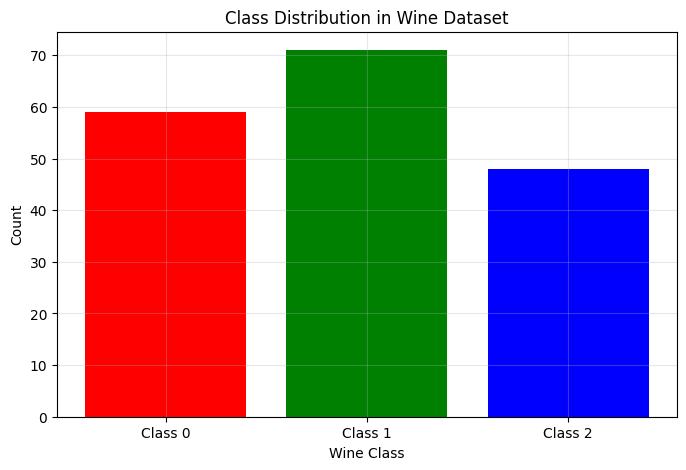


Basic Statistics:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359

In [3]:
# Basic exploratory data analysis
import matplotlib.pyplot as plt

# Checking missing values
print("Missing values:", df.isnull().sum().sum())

# Visualizing class balance
plt.figure(figsize=(8, 5))
class_counts = df['target'].value_counts().sort_index()
class_labels = ['Class 0', 'Class 1', 'Class 2']
plt.bar(class_labels, [class_counts[0], class_counts[1], class_counts[2]],
        color=['red', 'green', 'blue'])
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.title('Class Distribution in Wine Dataset')
plt.grid(True, alpha=0.3)
plt.show()

# Statistical summary
print("\nBasic Statistics:")
print(df.describe())

In [4]:
# Preparing data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating features and target
X = data.data
y = data.target

# Split into train and test sets
# We use 80-20 split, random_state for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for gradient descent and distance-based algorithms)
# NOTE: We fit on training data only to avoid data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nFeatures are now standardized (mean=0, std=1)")
print("Sample feature means after scaling:", X_train_scaled.mean(axis=0)[:3])
print("Sample feature stds after scaling:", X_train_scaled.std(axis=0)[:3])

Training set size: (142, 13)
Test set size: (36, 13)

Features are now standardized (mean=0, std=1)
Sample feature means after scaling: [ 8.30321727e-15 -5.73387191e-16  4.72196617e-15]
Sample feature stds after scaling: [1. 1. 1.]


---
## 1.2 Algorithm 1: Logistic Regression

### Definition

**Logistic Regression** is a linear model for classification. Despite its name, it's used for classification, not regression.

**How it works:**
1. Computes a linear combination of features: $z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$
2. Applies softmax function for multiclass: $P(class_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}$
3. Output is probability distribution over classes
4. Predicts class with highest probability



### Loss Function: Categorical Cross-Entropy (Log Loss)

**What it optimizes:**
The loss function measures how wrong our predictions are. For multiclass logistic regression, we use **categorical cross-entropy**:

$$L(y, \hat{y}) = -\frac{1}{N}\sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})$$

Where:
- $y_{ij}$ = 1 if sample $i$ belongs to class $j$, 0 otherwise
- $\hat{y}_{ij}$ = predicted probability for sample $i$ and class $j$
- $N$ = number of samples
- $C$ = number of classes (3 for wine)



### Gradient Descent

Gradient descent is an iterative optimization algorithm that finds the minimum of the loss function.

**Steps:**
1. Start with random weights $w$
2. Calculate loss with current weights
3. Compute gradient (derivative of loss with respect to weights)
4. Update weights: $w_{new} = w_{old} - \alpha \cdot \nabla L$
   - $\alpha$ = learning rate (how big each step is)
   - $\nabla L$ = gradient (direction of steepest increase)
5. Repeat until convergence



In [5]:
# Training Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# solver='lbfgs' is the default optimizer (gradient descent variant)
# max_iter=1000 gives enough iterations for convergence
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)  # Get probabilities

# Evaluate performance
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Results")
print("="*50)
print("Accuracy:", round(lr_accuracy, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Class 0', 'Class 1', 'Class 2']))

# Show confusion matrix
print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
print("\nInterpretation:")
print("  Rows = Actual class, Columns = Predicted class")
print("  Diagonal elements = Correct predictions")
print("  Off-diagonal = Misclassifications")

Logistic Regression Results
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        14
     Class 1       1.00      1.00      1.00        14
     Class 2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Interpretation:
  Rows = Actual class, Columns = Predicted class
  Diagonal elements = Correct predictions
  Off-diagonal = Misclassifications


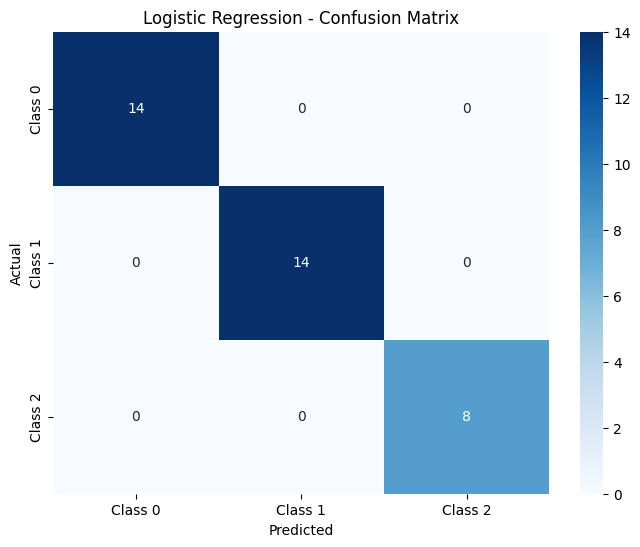

In [6]:
# Visualize confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

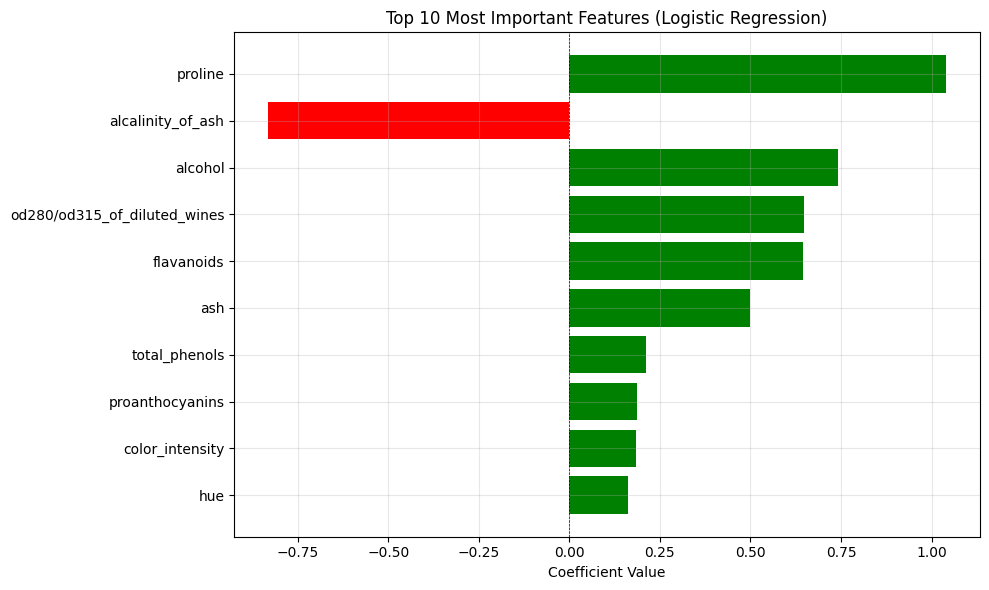

Interpretation:
  Positive coefficients: increase probability of Class 1
  Negative coefficients: increase probability of Class 0


In [7]:
# Visualize feature importance (model coefficients)
# NOTE: Larger absolute values mean more important features
feature_importance = lr_model.coef_[0]
feature_names = data.feature_names

# Get top 10 most important features
importance_indices = np.argsort(np.abs(feature_importance))[-10:]
top_features = [feature_names[i] for i in importance_indices]
top_importance = [feature_importance[i] for i in importance_indices]

plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in top_importance]
plt.barh(top_features, top_importance, color=colors)
plt.xlabel('Coefficient Value')
plt.title('Top 10 Most Important Features (Logistic Regression)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretation:")
print("  Positive coefficients: increase probability of Class 1")
print("  Negative coefficients: increase probability of Class 0")

---
## 1.3 Algorithm 2: K-Nearest Neighbors (KNN)

### Definition

**K-Nearest Neighbors (KNN)** is a non-parametric, instance-based algorithm.

**How it works:**
1. When predicting, finds K closest training examples to the test point
2. Uses distance metric (usually Euclidean) to measure "closeness"
3. Takes majority vote of those K neighbors' labels
4. No explicit training phase - just stores all data


**Algorithm Type:**
- **Non-parametric:** Doesn't assume a specific functional form
- **Instance-based:** Stores entire training dataset
- **Lazy learning:** No training phase, all computation at prediction time

### Distance Metrics

KNN relies on measuring distances between points. Common metrics:

**1. Euclidean Distance (most common):**
$$d(p,q) = \sqrt{\sum_{i=1}^{n}(p_i - q_i)^2}$$

**2. Manhattan Distance:**
$$d(p,q) = \sum_{i=1}^{n}|p_i - q_i|$$

**3. Minkowski Distance (generalization):**
$$d(p,q) = \left(\sum_{i=1}^{n}|p_i - q_i|^p\right)^{1/p}$$

For our problem, we'll use **Euclidean distance** (default) as it works well for continuous features.

In [8]:
# Finding optimal K value using cross-validation
# Testing different K values to find the best one

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Test different K values
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
cv_scores = []

print("Finding optimal K value...")

for k in k_values:
    # Creating KNN model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Performing 5-fold cross-validation
    # Cross-validation gives more reliable estimate than single train-test split
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    cv_scores.append(mean_score)

    print("K =", k, ": Mean CV Accuracy =", round(mean_score, 4))

# Find best K
best_k_index = cv_scores.index(max(cv_scores))
best_k = k_values[best_k_index]
print("\nBest K value:", best_k)
print("Best CV Accuracy:", round(max(cv_scores), 4))

Finding optimal K value...
K = 1 : Mean CV Accuracy = 0.9505
K = 3 : Mean CV Accuracy = 0.9576
K = 5 : Mean CV Accuracy = 0.951
K = 7 : Mean CV Accuracy = 0.9507
K = 9 : Mean CV Accuracy = 0.9369
K = 11 : Mean CV Accuracy = 0.9438
K = 13 : Mean CV Accuracy = 0.9648
K = 15 : Mean CV Accuracy = 0.9507

Best K value: 13
Best CV Accuracy: 0.9648


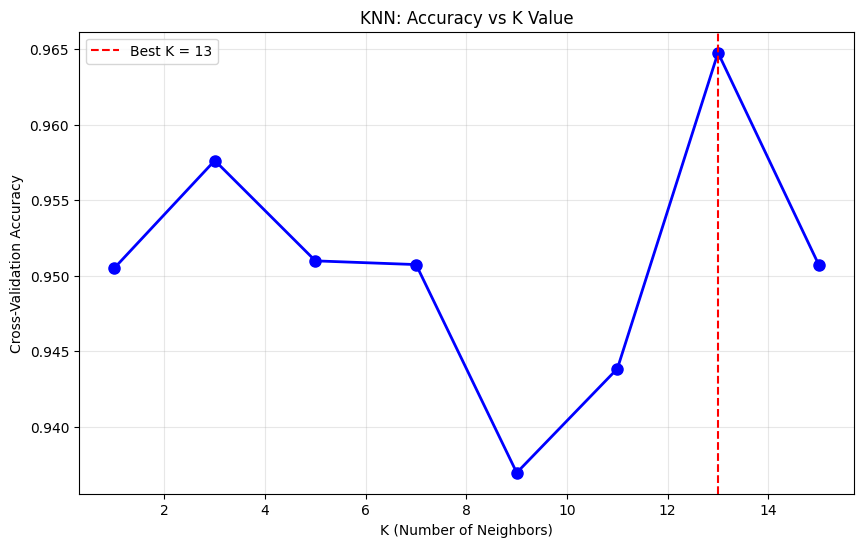

Interpretation:
  - Small K (1-3): May overfit, sensitive to noise
  - Large K (>15): May underfit, decision boundary too smooth
  - Best K ( 13 ): Good balance between bias and variance


In [9]:
# Visualizing K selection
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linewidth=2, markersize=8, color='blue')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Accuracy vs K Value')
plt.grid(True, alpha=0.3)
# Mark the best K
plt.axvline(x=best_k, color='red', linestyle='--', label='Best K = ' + str(best_k))
plt.legend()
plt.show()

print("Interpretation:")
print("  - Small K (1-3): May overfit, sensitive to noise")
print("  - Large K (>15): May underfit, decision boundary too smooth")
print("  - Best K (", best_k, "): Good balance between bias and variance")

In [10]:
# Training KNN with optimal K
# Using best_k from cross-validation
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)

# Evaluating performance
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Results (K =", best_k, ")")
print("="*50)
print("Accuracy:", round(knn_accuracy, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['Class 0', 'Class 1', 'Class 2']))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:")
print(cm_knn)

KNN Results (K = 13 )
Accuracy: 0.9722

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      1.00      0.97        14
     Class 1       1.00      0.93      0.96        14
     Class 2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36


Confusion Matrix:
[[14  0  0]
 [ 1 13  0]
 [ 0  0  8]]


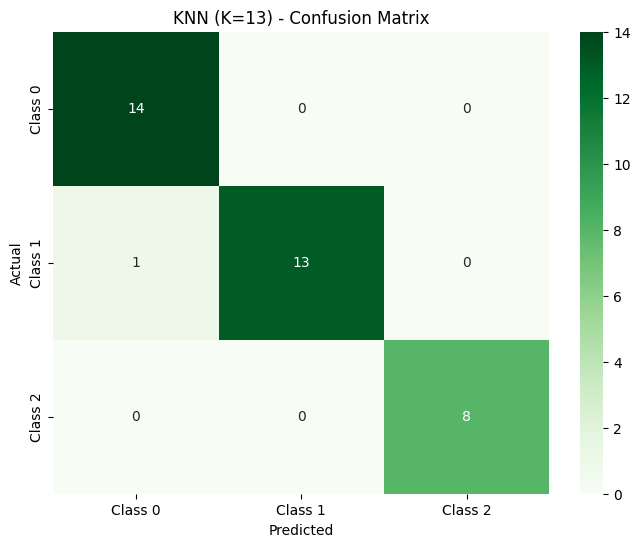

In [11]:
# Visualizing KNN confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN (K=' + str(best_k) + ') - Confusion Matrix')
plt.show()

---
## 1.4 Algorithm 3: Random Forest

### Definition

**Random Forest** is an ensemble learning method that builds multiple decision trees and combines their predictions.

**Working:**
1. Creates N decision trees (e.g., 100 trees)
2. Each tree is trained on a random subset of data (bootstrap sampling)
3. Each tree considers random subset of features at each split
4. Final prediction: majority vote across all trees



**Algorithm Type:**
- **Non-parametric:** No fixed functional form
- **Ensemble method:** Combines multiple models
- **Non-linear:** Can model complex decision boundaries


### Feature Importance

Random Forest calculates feature importance based on:
- How much each feature decreases impurity (Gini or entropy) across all trees
- Features used higher in trees or more frequently are more important

This helps us understand which features drive predictions.

In [12]:
# Training Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creating model
# n_estimators = number of trees in the forest
# max_depth limits tree depth to prevent overfitting

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)

# Evaluating performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Results")
print("="*50)
print("Number of trees:", 100)
print("Accuracy:", round(rf_accuracy, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Class 0', 'Class 1', 'Class 2']))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm_rf)

Random Forest Results
Number of trees: 100
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        14
     Class 1       1.00      1.00      1.00        14
     Class 2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


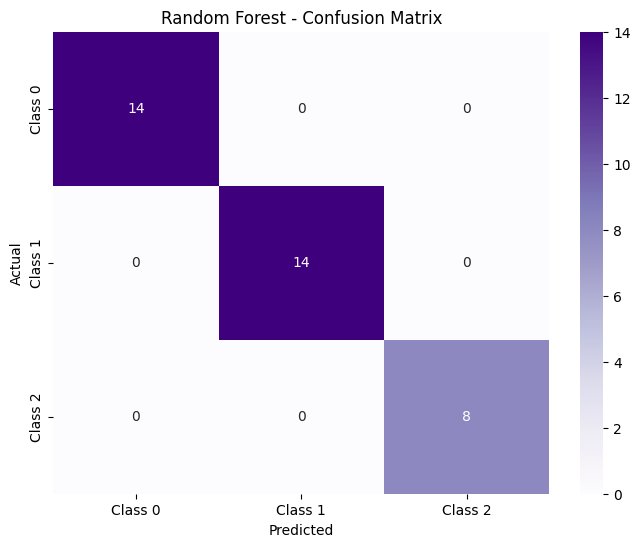

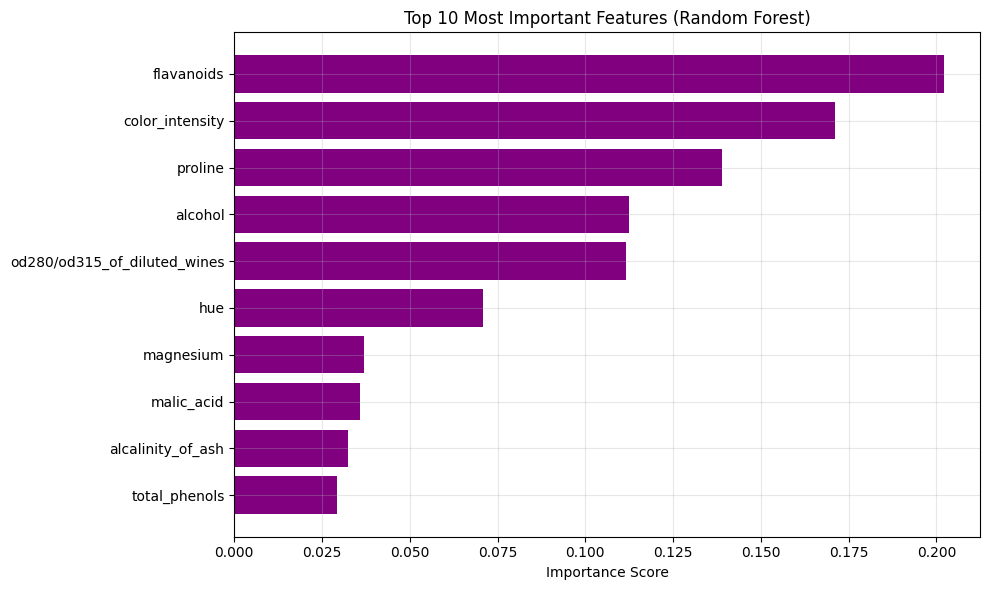

Interpretation:
  - Higher importance = feature is more useful for classification
  - Random Forest importance based on decrease in impurity


In [13]:
# Visualizing Random Forest confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# Feature importance from Random Forest
feature_importance_rf = rf_model.feature_importances_

# top 10 most important features
importance_indices_rf = np.argsort(feature_importance_rf)[-10:]
top_features_rf = []
top_importance_rf = []

for i in importance_indices_rf:
    top_features_rf.append(feature_names[i])
    top_importance_rf.append(feature_importance_rf[i])

plt.figure(figsize=(10, 6))
plt.barh(top_features_rf, top_importance_rf, color='purple')
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretation:")
print("  - Higher importance = feature is more useful for classification")
print("  - Random Forest importance based on decrease in impurity")

---
## 1.5 Comparative Analysis:

- Performance differences
- When each algorithm excels
- Tradeoffs between them
- Why one generalizes better than another

In [14]:
# Comparing all three models
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Calculating metrics for each model
models = ['Logistic Regression', 'KNN (K=' + str(best_k) + ')', 'Random Forest']
predictions = [y_pred_lr, y_pred_knn, y_pred_rf]
probabilities = [y_pred_proba_lr, y_pred_proba_knn, y_pred_proba_rf]

results = []

for i in range(len(models)):
    model_name = models[i]
    y_pred = predictions[i]
    y_proba = probabilities[i]

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

    results.append({
        'Model': model_name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-Score': round(f1, 4),
        'ROC-AUC': round(auc, 4)
    })

# Creating comparison DataFrame
results_df = pd.DataFrame(results)
print("Model Comparison")
print("="*80)
print(results_df.to_string(index=False))

print("\nMetric Definitions:")
print("  Accuracy: Overall correctness")
print("  Precision: Weighted average precision across classes")
print("  Recall: Weighted average recall across classes")
print("  F1-Score: Weighted harmonic mean of precision and recall")
print("  ROC-AUC: Area under ROC curve (One-vs-Rest average)")

Model Comparison
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    1.0000     1.0000  1.0000    1.0000      1.0
         KNN (K=13)    0.9722     0.9741  0.9722    0.9722      1.0
      Random Forest    1.0000     1.0000  1.0000    1.0000      1.0

Metric Definitions:
  Accuracy: Overall correctness
  Precision: Weighted average precision across classes
  Recall: Weighted average recall across classes
  F1-Score: Weighted harmonic mean of precision and recall
  ROC-AUC: Area under ROC curve (One-vs-Rest average)


/tmp/ipython-input-3258056057.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
/tmp/ipython-input-3258056057.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
/tmp/ipython-input-3258056057.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
/tmp/ipython-input-3258056057.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
/tmp/ipython-input-3258056057.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. af

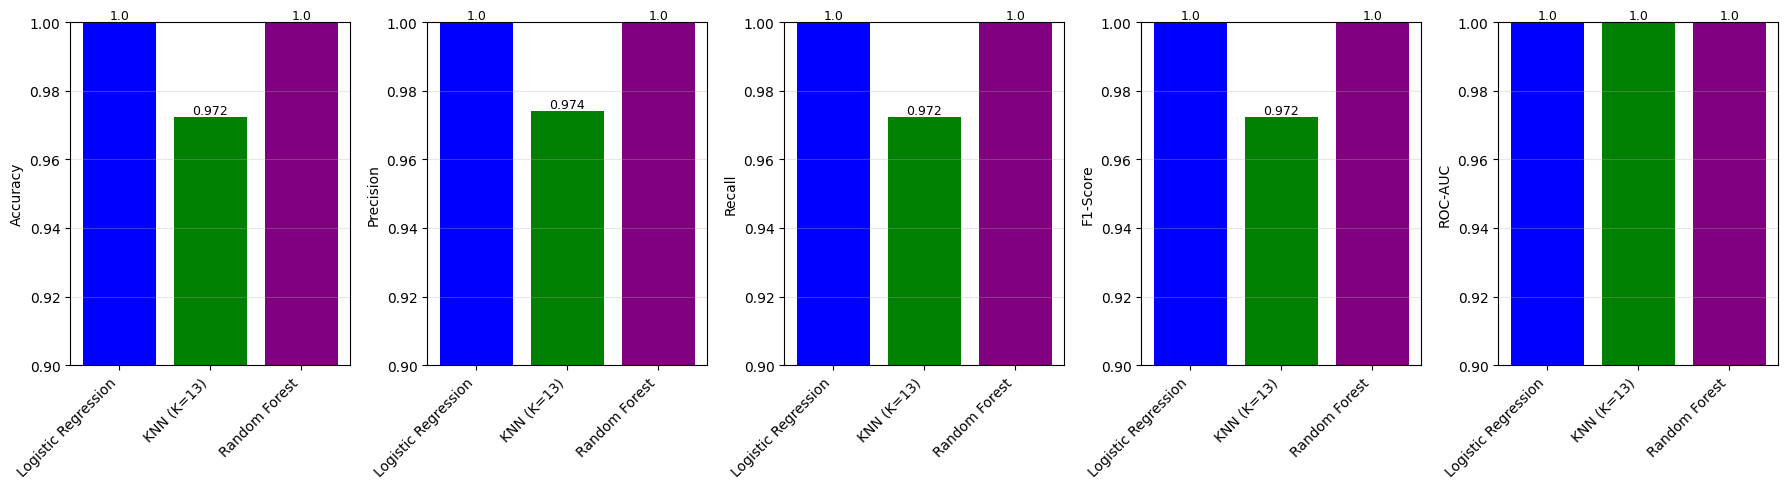

In [15]:
# Visualizing comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Creating grouped bar chart
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 5))

for idx in range(len(metrics)):
    metric = metrics[idx]
    ax = axes[idx]

    # Get values for this metric
    values = []
    for i in range(len(models)):
        values.append(results[i][metric])

    # Plot bars
    colors = ['blue', 'green', 'purple']
    bars = ax.bar(models, values, color=colors)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                str(round(height, 3)),
                ha='center', va='bottom', fontsize=9)

    ax.set_ylabel(metric)
    ax.set_ylim([0.9, 1.0])  # Zoom in to see differences
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Analysis: Performance Differences and Tradeoffs

#### **Why Random Forest often performs best:**
- Captures non-linear relationships in the data
- Handles feature interactions automatically
- Robust to outliers through ensemble averaging
- Less prone to overfitting than single decision tree

#### **Why Logistic Regression also performs well:**
- Data is largely linearly separable
- Features are well-scaled and normalized
- Simple model generalizes well
- No overfitting due to linear constraint

#### **Why KNN might be slightly lower:**
- Sensitive to curse of dimensionality (30 features)
- All features weighted equally (some may be noise)
- Decision boundaries can be rough/irregular

**Trade-offs:**

| Aspect | Logistic Regression | KNN | Random Forest |
|--------|-------------------|-----|---------------|
| **Training Speed** | Fast | Instant (no training) | Slow |
| **Prediction Speed** | Fast | Slow (computes all distances) | Medium |
| **Interpretability** | High (see coefficients) | Medium (see neighbors) | Low (many trees) |
| **Memory** | Low | High (stores all data) | Medium |
| **Handles Non-linearity** | No | Yes | Yes |
| **Overfitting Risk** | Low | Medium-High | Low-Medium |




---
---
# Problem 2: Diabetes Progression Prediction

## 2.1 Problem Description and Dataset

**Task:** Predict diabetes disease progression (quantitative measure) one year after baseline

- Regression task (different from classification)
- 10 baseline features (good for demonstrating PCA)
- Real medical application
- Shows when dimensionality reduction helps

**Focus:**
- Linear Regression baseline
- PCA for dimensionality reduction
- Gradient descent mechanics
- When PCA improves performance

In [16]:
# Loading diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

# Converting to DataFrame
diabetes_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
diabetes_df['target'] = diabetes_data.target

print("Dataset Shape:", diabetes_df.shape)
print("\nFeatures:", list(diabetes_data.feature_names))
print("\nFeature Descriptions:")
print("  age: Age in years")
print("  sex: Gender")
print("  bmi: Body mass index")
print("  bp: Average blood pressure")
print("  s1-s6: Six blood serum measurements")
print("\nTarget: Quantitative measure of disease progression one year after baseline")
print("\nFirst few rows:")
print(diabetes_df.head())

Dataset Shape: (442, 11)

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Feature Descriptions:
  age: Age in years
  sex: Gender
  bmi: Body mass index
  bp: Average blood pressure
  s1-s6: Six blood serum measurements

Target: Quantitative measure of disease progression one year after baseline

First few rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0 

Basic Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02

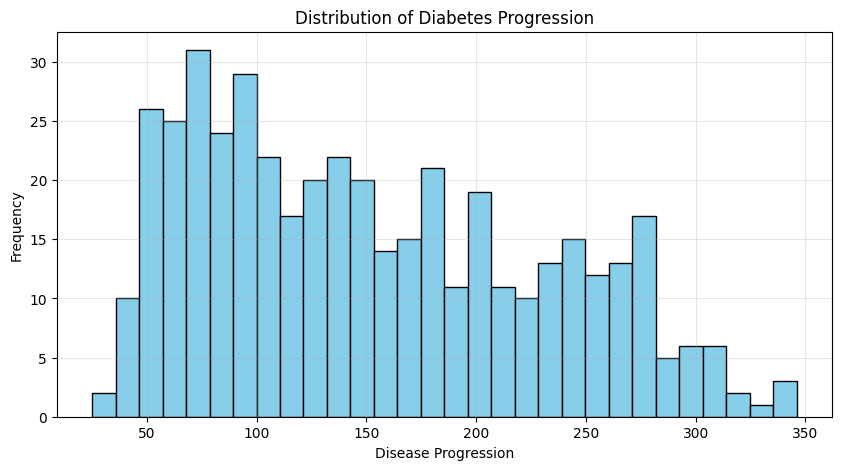

In [17]:
# Exploratory data analysis
print("Basic Statistics:")
print(diabetes_df.describe())

# Checking for missing values
print("\nMissing values:", diabetes_df.isnull().sum().sum())

# Visualizing target distribution
plt.figure(figsize=(10, 5))
plt.hist(diabetes_df['target'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes Progression')
plt.grid(True, alpha=0.3)
plt.show()

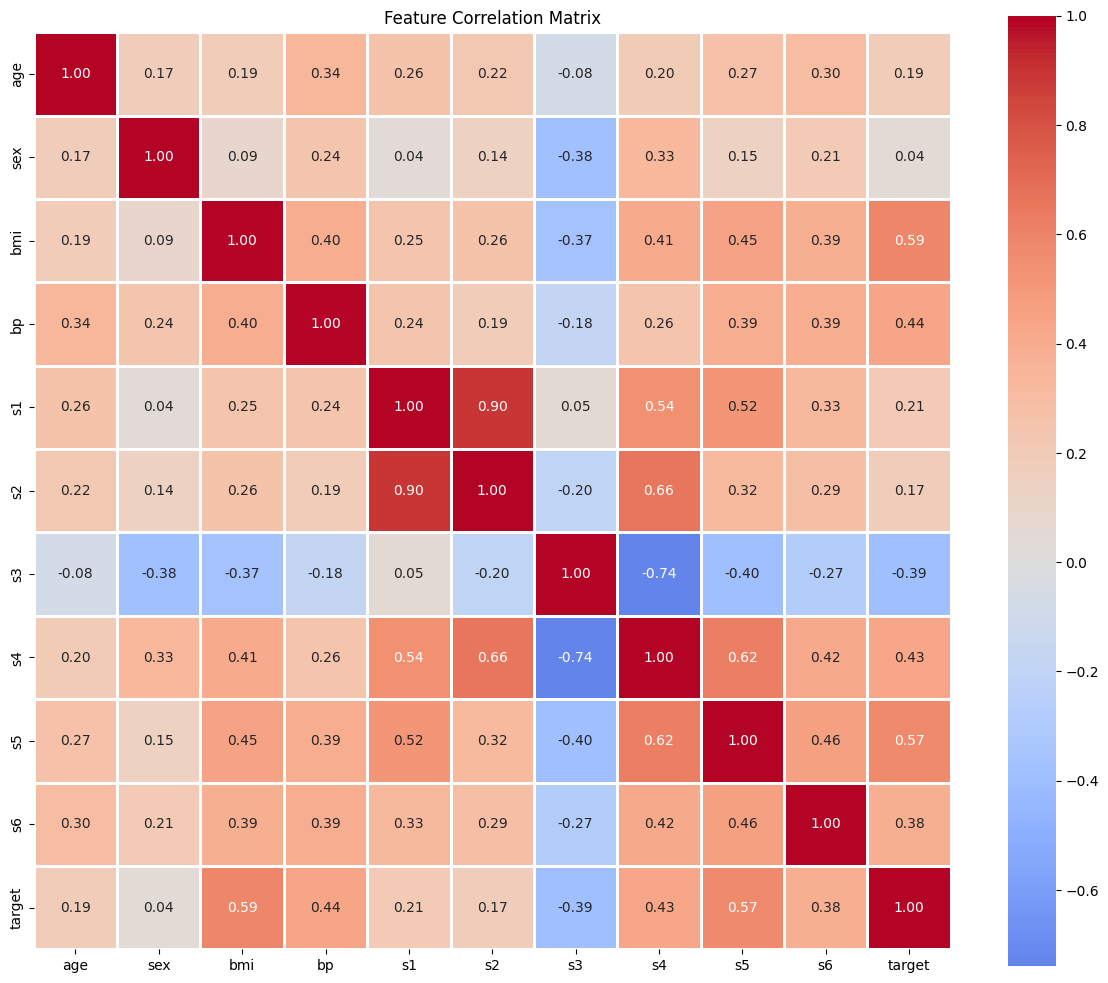

In [18]:
# Correlation analysis
# This helps us understand feature relationships
correlation_matrix = diabetes_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Observations:
  - Some features are correlated (e.g., s3 and s4)
  - This redundancy makes PCA useful
  - PCA will combine correlated features into principal components

In [30]:
# Prepare data for modeling
# Separate features and target
X_diabetes = diabetes_data.data
y_diabetes = diabetes_data.target

# Split into train and test
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Standardize features
# NOTE: Important for PCA and regression
scaler_diab = StandardScaler()
X_train_diab_scaled = scaler_diab.fit_transform(X_train_diab)
X_test_diab_scaled = scaler_diab.transform(X_test_diab)

print("Training set size:", X_train_diab.shape)
print("Test set size:", X_test_diab.shape)
print("Number of features:", X_train_diab.shape[1])

Training set size: (353, 10)
Test set size: (89, 10)
Number of features: 10


---
## 2.2 Linear Regression (Baseline)

### Definition

**Linear Regression** predicts a continuous target variable as a linear combination of input features.

**Model:**
$$\hat{y} = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

Where:
- $\hat{y}$ = predicted value
- $w_i$ = weights (coefficients)
- $x_i$ = input features
- $b$ = bias (intercept)

**Why Linear Regression for this problem?**
- Simple baseline for regression
- Fast training and prediction
- Interpretable coefficients
- Works well when relationship is roughly linear
- Assumes linear relationship
- Sensitive to multicollinearity (correlated features)


### Loss Function: Mean Squared Error (MSE)

**What it optimizes:**

Linear regression minimizes the **Mean Squared Error**:

$$MSE = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2$$

Where:
- $y_i$ = actual value
- $\hat{y}_i$ = predicted value
- $N$ = number of samples

**Why MSE?**
- Penalizes large errors more (squared term)
- Differentiable (can use gradient descent)
- Convex function (single global minimum)



### Gradient Descent for Linear Regression

**Two ways to solve linear regression:**

**1. Normal Equation (Closed-form):**
$$w = (X^TX)^{-1}X^Ty$$
- Computes optimal weights directly
- Fast for small datasets
- sklearn uses this by default

**2. Gradient Descent (Iterative):**
$$w_{new} = w_{old} - \alpha \cdot \nabla MSE$$

Where gradient is:
$$\nabla MSE = \frac{2}{N}X^T(X w - y)$$

**Variants:**
- **Batch GD:** Uses all samples per update (what we'll demonstrate)
- **Stochastic GD (SGD):** Uses one sample per update
- **Mini-batch GD:** Uses small batches (common in deep learning)

We'll implement gradient descent manually to show how it works!

In [20]:
# Implementing gradient descent from scratch

def gradient_descent_linear_regression(X, y, learning_rate=0.01, n_iterations=1000):
    """
    Implement linear regression using gradient descent

    Parameters:
    X: features (N samples x M features)
    y: target (N samples)
    learning_rate: step size for gradient descent
    n_iterations: number of iterations

    Returns:
    weights: learned weights
    bias: learned bias
    loss_history: MSE at each iteration
    """
    # Getting dimensions
    n_samples = X.shape[0]
    n_features = X.shape[1]

    # Initializing weights and bias to zero
    weights = np.zeros(n_features)
    bias = 0

    # Tracking loss over iterations
    loss_history = []

    # Gradient descent loop
    for iteration in range(n_iterations):
        # 1. Make predictions
        y_pred = np.dot(X, weights) + bias

        # 2. Calculate loss (MSE)
        loss = 0
        for i in range(n_samples):
            error = y_pred[i] - y[i]
            loss = loss + (error ** 2)
        loss = loss / n_samples
        loss_history.append(loss)

        # 3. Calculate gradients
        # Gradient for weights: (2/N) * X^T * (y_pred - y)
        dw = np.zeros(n_features)
        for j in range(n_features):
            gradient = 0
            for i in range(n_samples):
                gradient = gradient + (y_pred[i] - y[i]) * X[i, j]
            dw[j] = (2.0 / n_samples) * gradient

        # Gradient for bias: (2/N) * sum(y_pred - y)
        db = 0
        for i in range(n_samples):
            db = db + (y_pred[i] - y[i])
        db = (2.0 / n_samples) * db

        # 4. Update weights and bias
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db

        # Print progress every 100 iterations
        if iteration % 100 == 0:
            print("Iteration", iteration, ": Loss =", round(loss, 2))

    return weights, bias, loss_history

# Training using gradient descent
print("Training Linear Regression with Gradient Descent...")
print("="*60)
weights_gd, bias_gd, loss_history = gradient_descent_linear_regression(
    X_train_diab_scaled, y_train_diab, learning_rate=0.01, n_iterations=1000
)
print("\nTraining complete!")

Training Linear Regression with Gradient Descent...
Iteration 0 : Loss = 29711.32
Iteration 100 : Loss = 3338.54
Iteration 200 : Loss = 2906.38
Iteration 300 : Loss = 2897.0
Iteration 400 : Loss = 2895.74
Iteration 500 : Loss = 2894.74
Iteration 600 : Loss = 2893.78
Iteration 700 : Loss = 2892.87
Iteration 800 : Loss = 2891.98
Iteration 900 : Loss = 2891.13

Training complete!


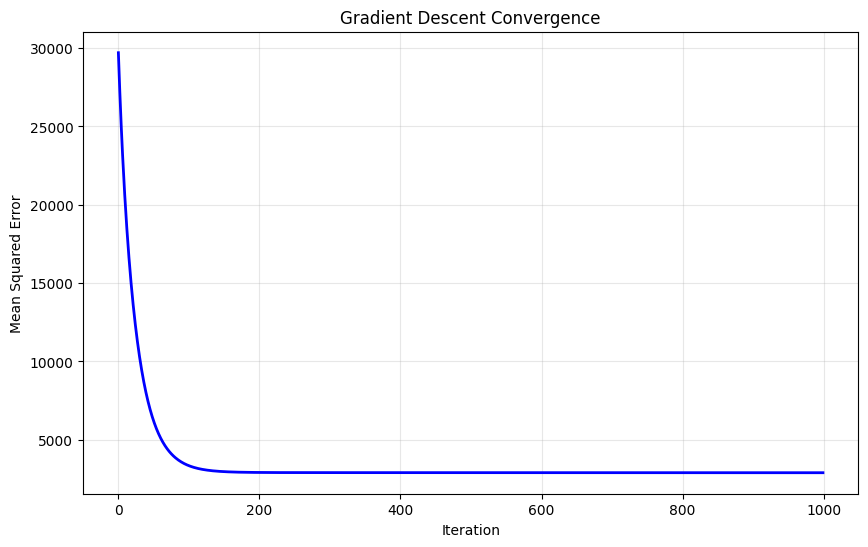

Observations:
  - Loss decreases rapidly at first
  - Then gradually plateaus (converges)
  - Final loss: 2890.32
  - This shows gradient descent is working correctly!


In [21]:
# Visualize gradient descent convergence
plt.figure(figsize=(10, 6))
plt.plot(loss_history, color='blue', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Convergence')
plt.grid(True, alpha=0.3)
plt.show()

print("Observations:")
print("  - Loss decreases rapidly at first")
print("  - Then gradually plateaus (converges)")
print("  - Final loss:", round(loss_history[-1], 2))
print("  - This shows gradient descent is working correctly!")

In [22]:
# Comparing with sklearn's LinearRegression (uses closed-form solution)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train sklearn model
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train_diab_scaled, y_train_diab)

# Make predictions with both models
# Our gradient descent model
y_pred_gd = np.dot(X_test_diab_scaled, weights_gd) + bias_gd
# Sklearn model
y_pred_sklearn = lr_sklearn.predict(X_test_diab_scaled)

# Calculate metrics
mse_gd = mean_squared_error(y_test_diab, y_pred_gd)
mse_sklearn = mean_squared_error(y_test_diab, y_pred_sklearn)
r2_gd = r2_score(y_test_diab, y_pred_gd)
r2_sklearn = r2_score(y_test_diab, y_pred_sklearn)

print("Linear Regression Results (Baseline)")
print("="*60)
print("\nOur Gradient Descent Implementation:")
print("  MSE:", round(mse_gd, 2))
print("  R² Score:", round(r2_gd, 4))
print("\nSklearn (Closed-form Solution):")
print("  MSE:", round(mse_sklearn, 2))
print("  R² Score:", round(r2_sklearn, 4))

print("\nR² Interpretation:")
print("  R² = 1.0 means perfect predictions")
print("  R² = 0.0 means model is no better than predicting mean")
print("  Our R² ≈", round(r2_sklearn, 2), "means model explains ~" + str(round(r2_sklearn*100)) + "% of variance")

Linear Regression Results (Baseline)

Our Gradient Descent Implementation:
  MSE: 2885.61
  R² Score: 0.4554

Sklearn (Closed-form Solution):
  MSE: 2900.19
  R² Score: 0.4526

R² Interpretation:
  R² = 1.0 means perfect predictions
  R² = 0.0 means model is no better than predicting mean
  Our R² ≈ 0.45 means model explains ~45% of variance


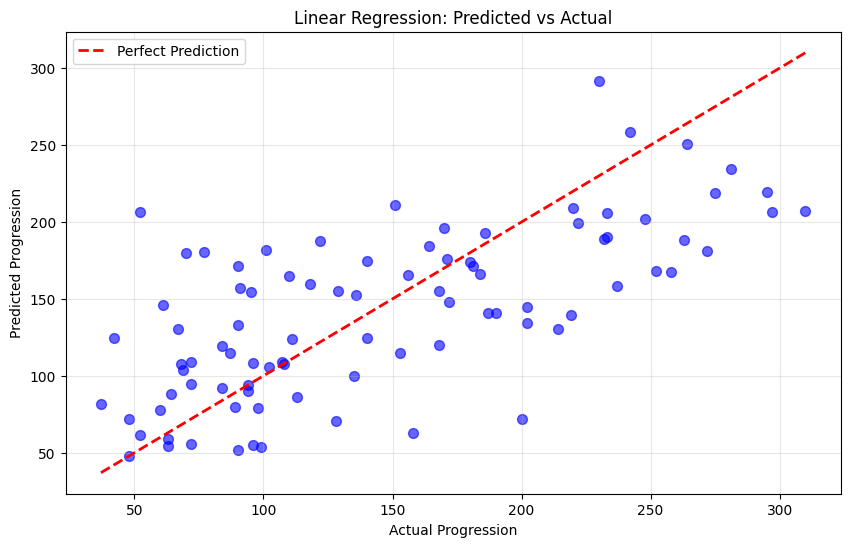

In [23]:
# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_diab, y_pred_sklearn, alpha=0.6, color='blue', s=50)
plt.plot([y_test_diab.min(), y_test_diab.max()],
         [y_test_diab.min(), y_test_diab.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Interpretation:
  - Points close to red line = good predictions
  - Points far from line = prediction errors
  - Some scatter is expected (real-world data has noise)

---
## 2.3 Principal Component Analysis (PCA)

### Definition

**Principal Component Analysis (PCA)** is a dimensionality reduction technique that transforms features into a new set of uncorrelated variables (principal components).

**How it works:**
1. Standardize features (mean=0, std=1)
2. Compute covariance matrix
3. Find eigenvectors and eigenvalues
4. Sort eigenvectors by eigenvalues (largest to smallest)
5. Select top K eigenvectors as principal components
6. Transform data to new coordinate system

**Why use PCA for this problem?**
- Reduces 10 features to fewer dimensions
- Removes correlation between features
- Keeps most variance (information)
- Can improve model performance by reducing noise
- Helps visualization (can plot in 2D/3D)



PCA Variance Analysis
Variance explained by each component:
  PC1: 0.3969 (Cumulative: 0.3969 )
  PC2: 0.1478 (Cumulative: 0.5447 )
  PC3: 0.1252 (Cumulative: 0.6698 )
  PC4: 0.1011 (Cumulative: 0.7709 )
  PC5: 0.0658 (Cumulative: 0.8368 )
  PC6: 0.0594 (Cumulative: 0.8961 )
  PC7: 0.052 (Cumulative: 0.9481 )
  PC8: 0.0434 (Cumulative: 0.9915 )
  PC9: 0.0076 (Cumulative: 0.9991 )
  PC10: 0.0009 (Cumulative: 1.0 )


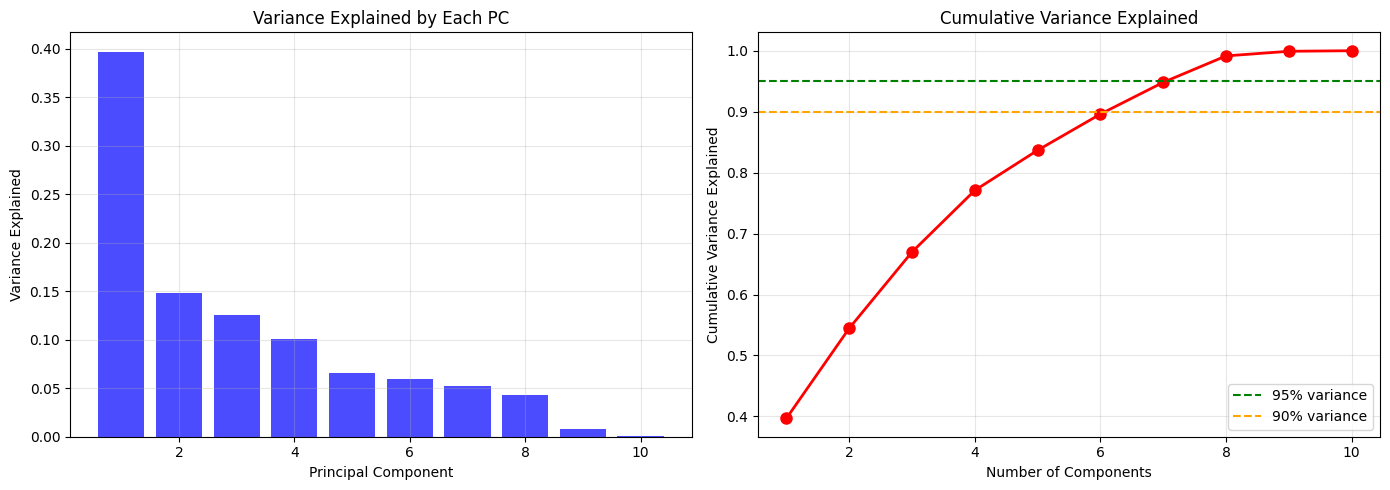

In [24]:
from sklearn.decomposition import PCA

# Fitting PCA with all components to see variance
# using all 10 components first to analyze
pca_full = PCA()
pca_full.fit(X_train_diab_scaled)

# explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("PCA Variance Analysis")
print("="*60)
print("Variance explained by each component:")
for i in range(len(explained_variance)):
    print("  PC" + str(i+1) + ":", round(explained_variance[i], 4),
          "(Cumulative:", round(cumulative_variance[i], 4), ")")

# Visualizing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Individual variance
ax1.bar(range(1, len(explained_variance)+1), explained_variance, color='blue', alpha=0.7)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained')
ax1.set_title('Variance Explained by Each PC')
ax1.grid(True, alpha=0.3)

# Cumulative variance
ax2.plot(range(1, len(cumulative_variance)+1), cumulative_variance,
         marker='o', color='red', linewidth=2, markersize=8)
ax2.axhline(y=0.95, color='green', linestyle='--', label='95% variance')
ax2.axhline(y=0.90, color='orange', linestyle='--', label='90% variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Variance Explained')
ax2.set_title('Cumulative Variance Explained')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Determining optimal number of components
variance_threshold = 0.95
n_components_95 = 0
for i in range(len(cumulative_variance)):
    if cumulative_variance[i] >= variance_threshold:
        n_components_95 = i + 1
        break

To capture 95% of variance, we need: 8 components.
Reduction from 10 dimensions to 8 dimensions

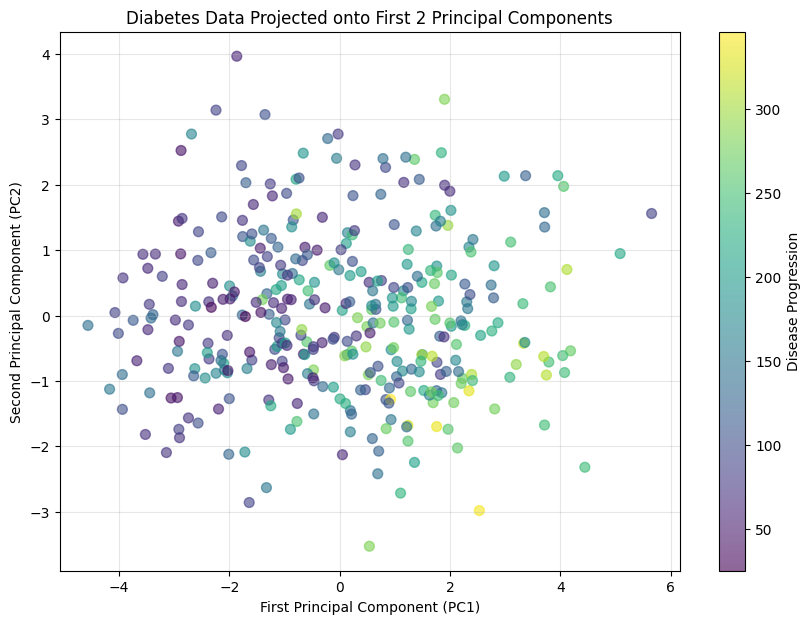

In [25]:
# Visualizing data in first 2 principal components
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_diab_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1],
                     c=y_train_diab, cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Disease Progression')
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('Diabetes Data Projected onto First 2 Principal Components')
plt.grid(True, alpha=0.3)
plt.show()

Interpretation:
  - PC1 and PC2 capture 54.5 % of variance
  - Color shows disease progression
  - Some clustering visible (darker points tend to group)

### Application:

**PCA is useful for:**

**1. Dimensionality Reduction:**
- Reduces computational cost
- Speeds up training
- Reduces memory usage

**2. Noise Reduction:**
- Minor components often contain noise
- Removing them can improve generalization

**3. Multicollinearity Removal:**
- PCs are uncorrelated by construction
- Helps models that struggle with correlated features

**4. Visualization:**
- Can plot high-dimensional data in 2D/3D
- Helps understand data structure

**5. Feature Engineering:**
- Creates new meaningful features
- Can capture hidden patterns



---
## 2.4 Linear Regression with PCA

Now we'll apply PCA before Linear Regression to see if it improves performance.

In [32]:
# Applying PCA with optimal number of components

n_components = n_components_95  # Use enough to capture 95% variance

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_diab_scaled)
X_test_pca = pca.transform(X_test_diab_scaled)

print("PCA Transformation")
print("="*60)
print("Original dimensions:", X_train_diab_scaled.shape[1])
print("Reduced dimensions:", X_train_pca.shape[1])
print("Variance retained:", round(cumulative_variance[n_components-1]*100, 2), "%")

# Training Linear Regression on PCA-transformed data
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_diab)

# Making predictions
y_pred_pca = lr_pca.predict(X_test_pca)

# Calculating metrics
mse_pca = mean_squared_error(y_test_diab, y_pred_pca)
r2_pca = r2_score(y_test_diab, y_pred_pca)
mae_pca = mean_absolute_error(y_test_diab, y_pred_pca)

print("\nLinear Regression with PCA Results:")
print("  MSE:", round(mse_pca, 2))
print("  MAE:", round(mae_pca, 2))
print("  R² Score:", round(r2_pca, 4))

PCA Transformation
Original dimensions: 10
Reduced dimensions: 8
Variance retained: 99.15 %

Linear Regression with PCA Results:
  MSE: 2883.43
  MAE: 42.92
  R² Score: 0.4558


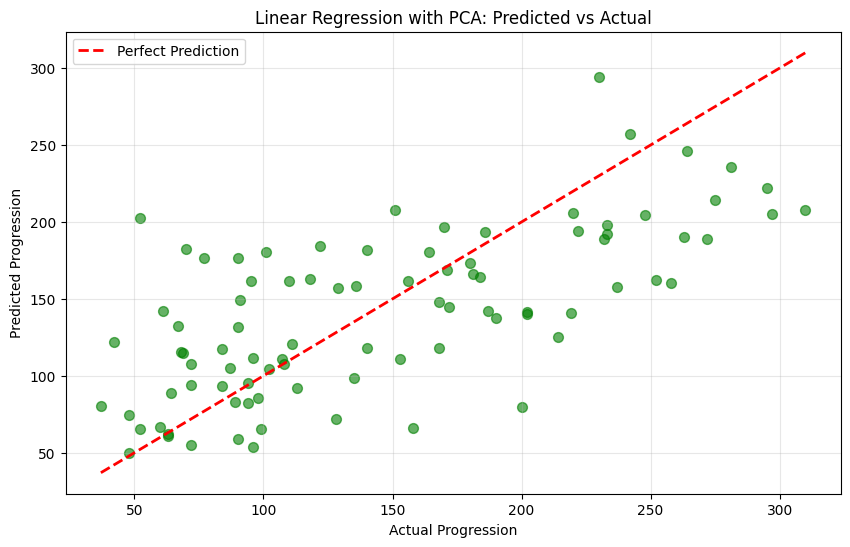

In [33]:
# Visualizing PCA model predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test_diab, y_pred_pca, alpha=0.6, color='green', s=50)
plt.plot([y_test_diab.min(), y_test_diab.max()],
         [y_test_diab.min(), y_test_diab.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.title('Linear Regression with PCA: Predicted vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---
## 2.5 Comparison: Linear Regression vs Linear Regression with PSA


In [34]:
# Comparing both models
comparison_results = {
    'Model': ['Linear Regression (Baseline)', 'Linear Regression + PCA'],
    'Features': [X_train_diab_scaled.shape[1], X_train_pca.shape[1]],
    'MSE': [round(mse_sklearn, 2), round(mse_pca, 2)],
    'MAE': [round(mean_absolute_error(y_test_diab, y_pred_sklearn), 2), round(mae_pca, 2)],
    'R² Score': [round(r2_sklearn, 4), round(r2_pca, 4)]
}

comparison_df = pd.DataFrame(comparison_results)
print("Model Comparison: Impact of PCA")
print("="*80)
print(comparison_df.to_string(index=False))

# CalculatING improvement
mse_improvement = ((mse_sklearn - mse_pca) / mse_sklearn) * 100
r2_change = r2_pca - r2_sklearn

print("\nAnalysis:")
if mse_pca < mse_sklearn:
    print("  PCA improved performance!")
    print("  - MSE reduced by", round(mse_improvement, 2), "%")
else:
    print("  PCA did not improve performance")
    print("  - MSE increased by", round(-mse_improvement, 2), "%")

print("  - R² changed by", round(r2_change, 4))
print("  - Dimensionality reduced from", X_train_diab_scaled.shape[1],
      "to", X_train_pca.shape[1], "features")

Model Comparison: Impact of PCA
                       Model  Features     MSE   MAE  R² Score
Linear Regression (Baseline)        10 2900.19 42.79    0.4526
     Linear Regression + PCA         8 2883.43 42.92    0.4558

Analysis:
  PCA improved performance!
  - MSE reduced by 0.58 %
  - R² changed by 0.0032
  - Dimensionality reduced from 10 to 8 features


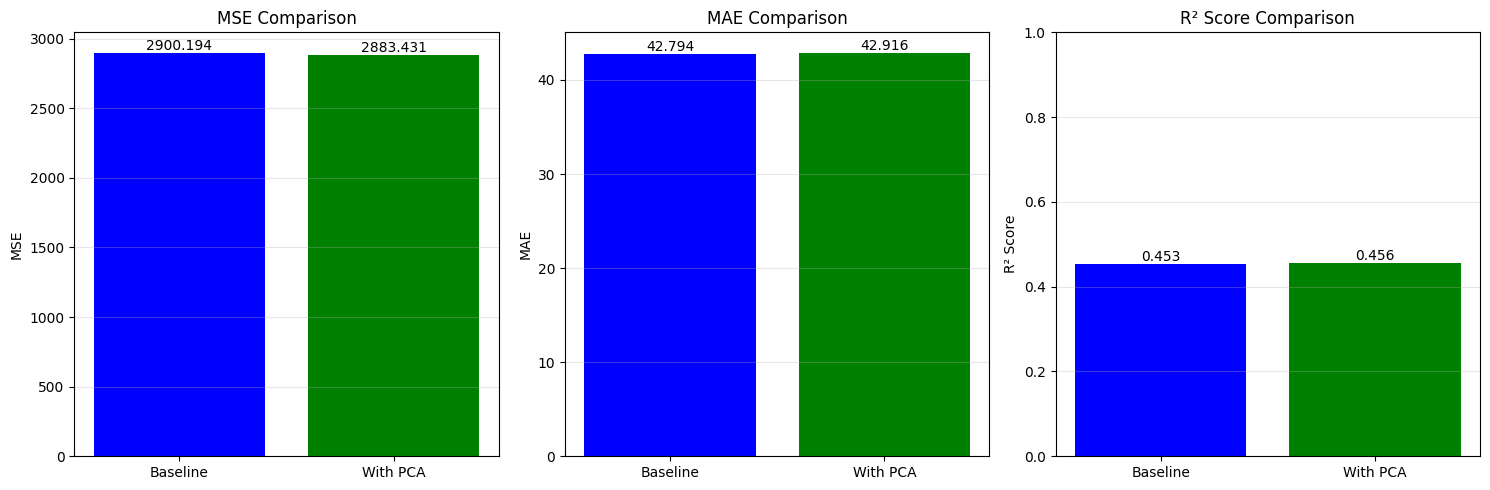

In [35]:
# Visualizing comparison
metrics = ['MSE', 'MAE', 'R² Score']
baseline_values = [mse_sklearn, mean_absolute_error(y_test_diab, y_pred_sklearn), r2_sklearn]
pca_values = [mse_pca, mae_pca, r2_pca]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(metrics)):
    ax = axes[i]
    metric = metrics[i]

    # Plot bars
    bars = ax.bar(['Baseline', 'With PCA'],
                   [baseline_values[i], pca_values[i]],
                   color=['blue', 'green'])

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                str(round(height, 3)),
                ha='center', va='bottom', fontsize=10)

    ax.set_ylabel(metric)
    ax.set_title(metric + ' Comparison')
    ax.grid(True, alpha=0.3, axis='y')

    # Note: For R², higher is better; for MSE and MAE, lower is better
    if metric == 'R² Score':
        ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

---
# Final Summary and Key Takeaways

## Problem 1: Wine Classification

**Algorithms Compared:**
1. **Logistic Regression**: Linear model, fast, interpretable
2. **KNN**: Non-parametric, instance-based, distance metrics
3. **Random Forest**: Ensemble, non-linear, feature importance

**Key Learnings:**
- Algorithm selection depends on problem characteristics
- Linear models work well when classes are linearly separable
- Non-linear models (RF, KNN) capture complex patterns
- Ensemble methods (RF) provide robustness
- Tradeoff: Interpretability vs Performance vs Speed

**Loss Functions:**
- Binary Cross-Entropy for Logistic Regression
- Optimizes probability estimates
- Convex → guaranteed global minimum

**Gradient Descent:**
- Iterative optimization algorithm
- Updates weights in direction of steepest descent
- Variants: Batch, Stochastic, Mini-batch
- sklearn uses advanced optimizers (LBFGS)

## Problem 2: Diabetes Progression Prediction

**Approaches Compared:**
1. **Linear Regression**: Baseline, simple, interpretable
2. **PCA + Linear Regression**: Dimensionality reduction, noise filtering

**Key Learnings:**
- Gradient descent demonstrated from scratch
- PCA reduces dimensions while preserving variance
- Dimensionality reduction can improve generalization
- Tradeoff: Fewer features vs Information loss

**Loss Function:**
- Mean Squared Error (MSE) for regression
- Penalizes large errors heavily
- Has closed-form solution (Normal Equation)

**Gradient Descent Mechanics:**
- Showed step-by-step implementation
- Converges to global minimum (convex loss)
- Learning rate controls step size